# Example notebook : Dataset bias analyse for regression

## Load packages

In [1]:
import numpy as np

from transparentai.datasets import StructuredDataset, load_boston
from transparentai.fairness import DatasetBiasMetric

## Load adult dataset

In [2]:
boston = load_boston()

## Prepare and create DatasetBiasMetric

To create a DatasetBiasMetric you need a StructuredDataset object and a privileged_groups dictionnary where is indicate which variable is / are protected and what is the privileged values.

In [5]:
# Transform age to be a categorical variable for protected attributes
boston['age category'] = np.where(boston['AGE'] < 26, 'Young',
                                 np.where(boston['AGE'] < 61, 'Adult','Elder'))

In [6]:
target = 'MEDV'
dataset = StructuredDataset(df=boston, target=target)

privileged_groups = {
    'age category': ['Adult']
}   
dataset_bias = DatasetBiasMetric(dataset, privileged_groups)

## Display dataset bias metrics & save to file

In [7]:
dataset_bias.get_bias_metrics()

Disparate impact  Statistical parity difference
attr         index                                                    
age category >22.533           0.611134                      -0.224678
             <=22.533          1.532132                       0.224678

In [9]:
dataset_bias.save_bias_metrics(fname='save/adult_dataset_bias_metrics_regr.json')

## Get some insight

In [10]:
insight = dataset_bias.insight()
insight
for attr, bias_dict in insight.items():
    for target_value, string in bias_dict.items():
        print('---------')
        print(f'{attr} : target_value = {target_value}')
        print(string)

---------
age category : target_value = >22.533
For this target value (>22.533) regarding the 'age category' attribute 2 for the 2 bias metrics are/is biased so you can considered that the dataset is biased.
---------
age category : target_value = <=22.533
For this target value (<=22.533) regarding the 'age category' attribute 2 for the 2 bias metrics are/is biased so you can considered that the dataset is biased.


## Plot dataset bias metrics

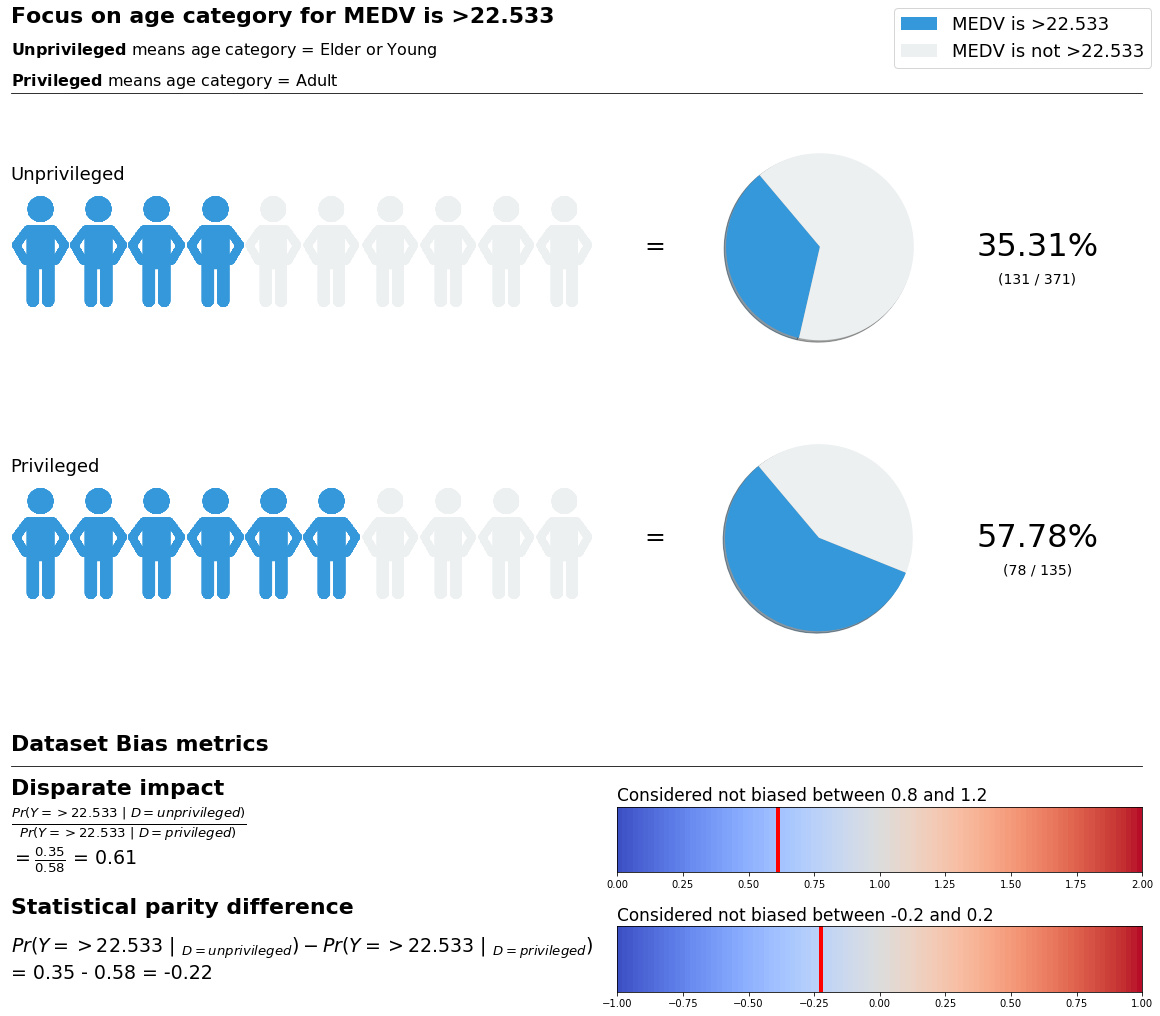

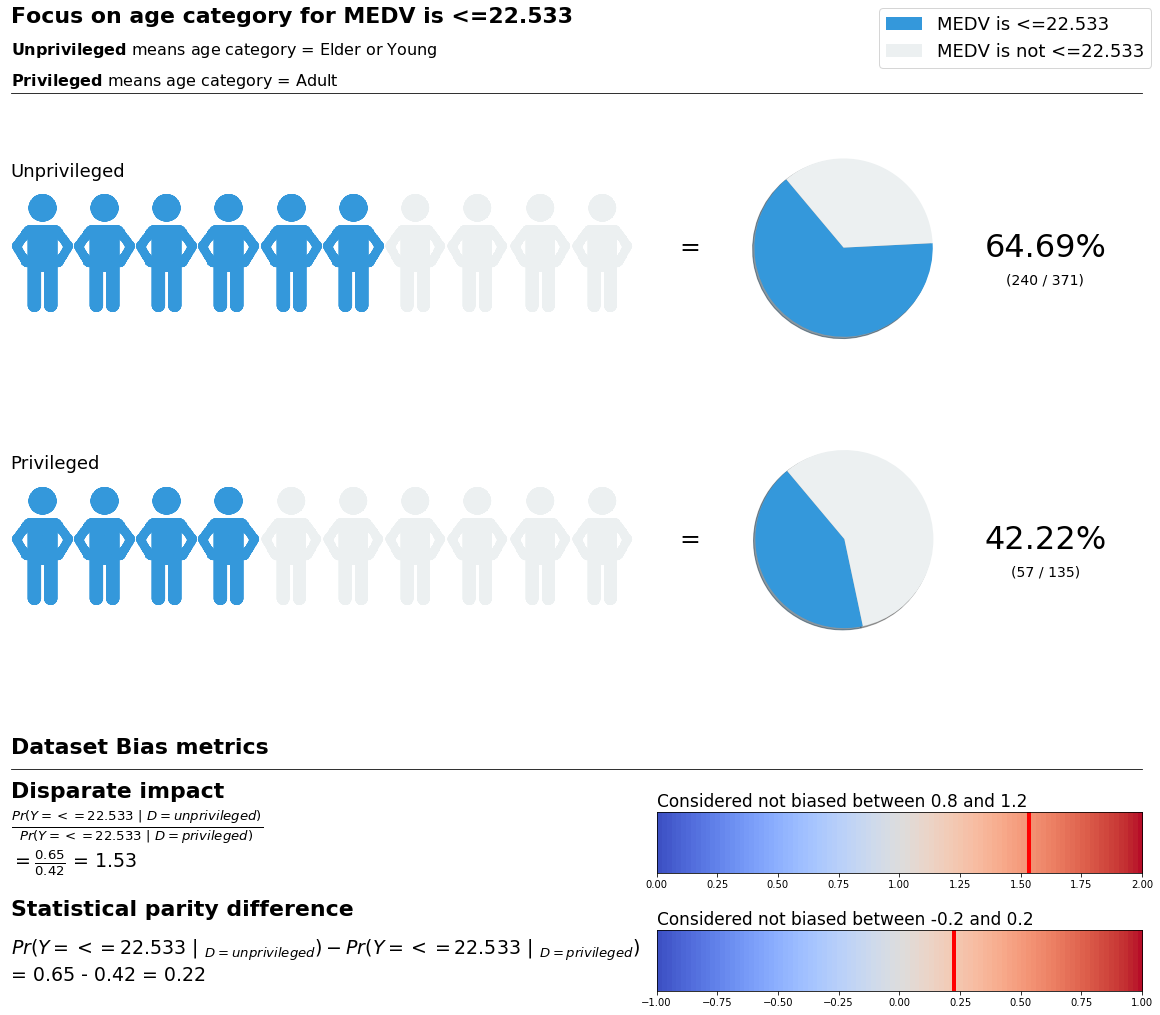

In [11]:
dataset_bias.plot_bias()

## The end.